In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
def hist_show(d, b = 50):
    plt.hist(d, bins = b)
    plt.show()
    
    
def mm_scaler(d):
    d = np.array(d).reshape(-1, 1)
    d =MinMaxScaler().fit_transform(d).flatten()
    return d


def standard_scaler(d):
    d = np.array(d).reshape(-1, 1)
    d =StandardScaler().fit_transform(d).flatten()
    return d


def replace_zero_to_mean(d):
    mean_data = int(d.mean())
    return d.replace(0, mean_data)

In [3]:
# Загрузка и анализ набора данных
museum_dataset = pd.read_csv('Набор_1_музеи_России.csv',  sep=';')
museum_dataset.head(10)

,name,base_fond,science_fond,ams,n_buildings,n_days,guests,employees
0,Курганинский исторический музей,23093,4111,0,1,308,17.8,18
1,Таманский музейный комплекс,16451,5476,14625,7,314,102.2,40
2,Музей истории и краеведения г.Лабинска,21181,2016,0,1,247,28.3,18
3,Дом-музей А.Киселева г.Туапсе,3846,1196,5042,1,360,54.4,10
4,Красногвардейский историко-краеведческий музей,10778,6650,3183,2,247,7.9,5
5,Гиагинский районный краеведческий музей им.П....,17276,5434,4265,1,254,10.2,3
6,Краснодарский выставочный зал ИЗО,641,170,0,1,302,131.4,29
7,Краеведческий музей г.Адыгейска,3784,630,3784,1,254,2.7,2
8,Алтайский гос.мемориальный музей Г.С.Титова,7668,2430,1234,3,310,19.8,20
9,Колыванский музей истории камнерезного дела на...,1517,942,0,1,265,5.8,3


In [4]:
# Создаем набор данных, в котором будут храниться обработанные данные
dataset = pd.DataFrame()

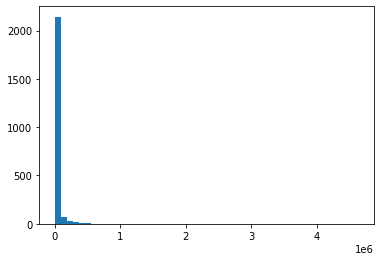

In [5]:
# обработка колонки "base_fond"
data = museum_dataset['base_fond']

hist_show(data)

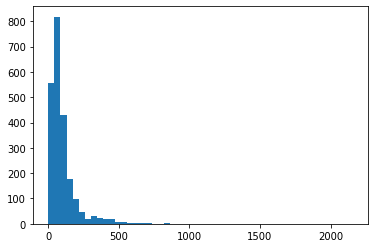

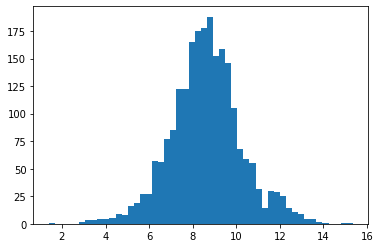

In [6]:
hist_show(data**0.5)
hist_show(np.log(data))

In [7]:
dataset['base_fond'] = standard_scaler(np.log(data)) 
dataset.head(10)

,base_fond
0,0.871895
1,0.665213
2,0.819225
3,-0.220496
4,0.407500
5,0.695033
6,-1.312439
7,-0.230401
8,0.200020
9,-0.787443


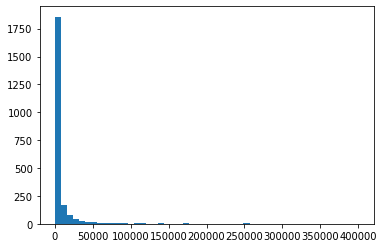

In [8]:
data = museum_dataset['science_fond']
hist_show(data)

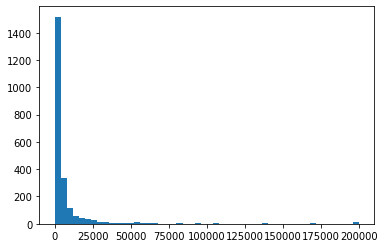

In [9]:
data = np.clip(data, 0, 200000)
hist_show(data)

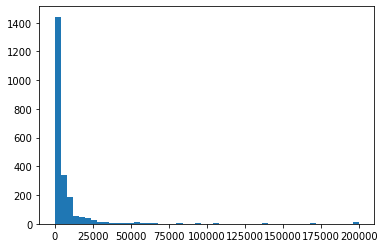

In [10]:
data = replace_zero_to_mean(data)
hist_show(data)

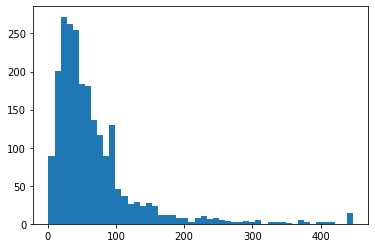

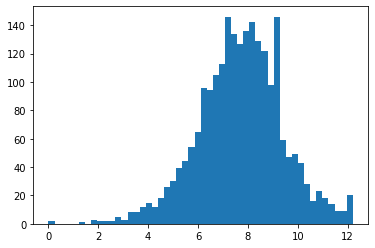

In [11]:
hist_show(data**0.5)
hist_show(np.log(data))

In [12]:
dataset['science_fond'] = mm_scaler(np.log(data))
dataset.head(10)

,base_fond,science_fond
0,0.871895,0.681744
1,0.665213,0.705233
2,0.819225,0.623368
3,-0.220496,0.580591
4,0.407500,0.721147
5,0.695033,0.704603
6,-1.312439,0.420758
7,-0.230401,0.528075
8,0.200020,0.638670
9,-0.787443,0.561033


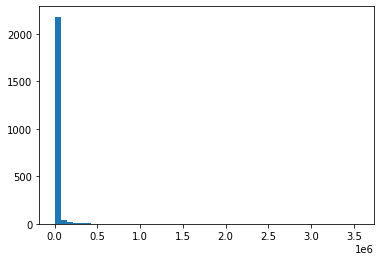

In [13]:
data = museum_dataset['ams']
hist_show(data)

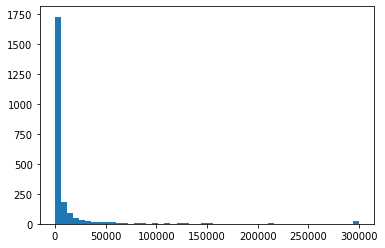

In [14]:
data = np.clip(data, 0, 300000)
hist_show(data)

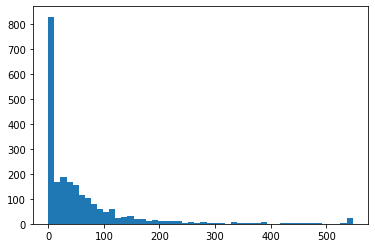

In [15]:
hist_show(data**0.5)


In [16]:
dataset['ams'] = mm_scaler(data**0.5)
dataset.head(10)

,base_fond,science_fond,ams
0,0.871895,0.681744,0.000000
1,0.665213,0.705233,0.220794
2,0.819225,0.623368,0.000000
3,-0.220496,0.580591,0.129641
4,0.407500,0.721147,0.103005
5,0.695033,0.704603,0.119234
6,-1.312439,0.420758,0.000000
7,-0.230401,0.528075,0.112309
8,0.200020,0.638670,0.064135
9,-0.787443,0.561033,0.000000


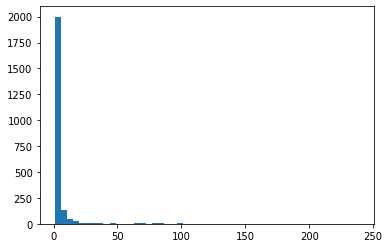

In [17]:
data = museum_dataset['n_buildings']
hist_show(data)

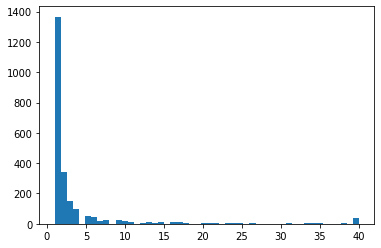

In [18]:
data = np.clip(data, 0, 40)
hist_show(data)

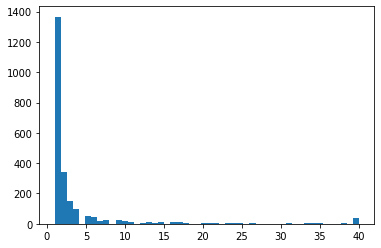

In [19]:
data = replace_zero_to_mean(data)
hist_show(data)

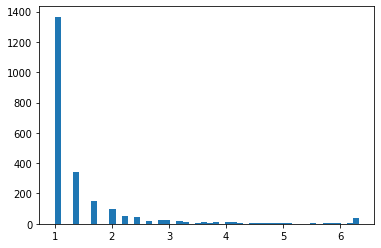

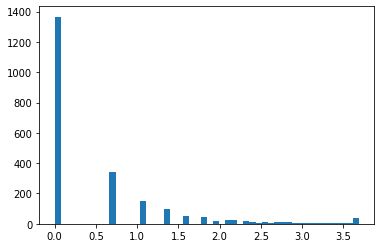

In [20]:
hist_show(data**0.5)
hist_show(np.log(data))

In [21]:
dataset['n_buildings'] = mm_scaler(data**0.5)
dataset.head(10)

,base_fond,science_fond,ams,n_buildings
0,0.871895,0.681744,0.000000,0.000000
1,0.665213,0.705233,0.220794,0.309087
2,0.819225,0.623368,0.000000,0.000000
3,-0.220496,0.580591,0.129641,0.000000
4,0.407500,0.721147,0.103005,0.077793
5,0.695033,0.704603,0.119234,0.000000
6,-1.312439,0.420758,0.000000,0.000000
7,-0.230401,0.528075,0.112309,0.000000
8,0.200020,0.638670,0.064135,0.137486
9,-0.787443,0.561033,0.000000,0.000000


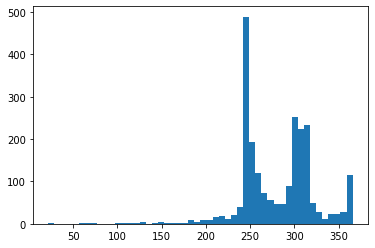

In [22]:
data = museum_dataset['n_days']
hist_show(data)

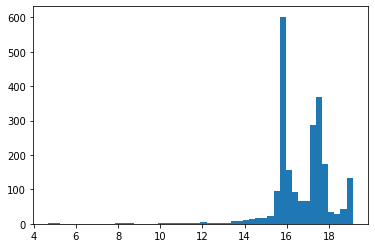

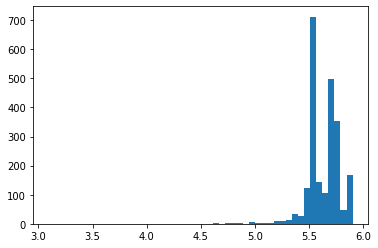

In [23]:
hist_show(data**0.5)
hist_show(np.log(data))

In [24]:
dataset['n_days'] = mm_scaler(np.log(data))
dataset.head(10)

,base_fond,science_fond,ams,n_buildings,n_days
0,0.871895,0.681744,0.000000,0.000000,0.938635
1,0.665213,0.705233,0.220794,0.309087,0.945497
2,0.819225,0.623368,0.000000,0.000000,0.860134
3,-0.220496,0.580591,0.129641,0.000000,0.994121
4,0.407500,0.721147,0.103005,0.077793,0.860134
5,0.695033,0.704603,0.119234,0.000000,0.870074
6,-1.312439,0.420758,0.000000,0.000000,0.931638
7,-0.230401,0.528075,0.112309,0.000000,0.870074
8,0.200020,0.638670,0.064135,0.137486,0.940937
9,-0.787443,0.561033,0.000000,0.000000,0.885153


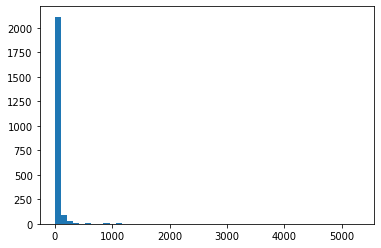

In [25]:
data = museum_dataset['guests']
hist_show(data)

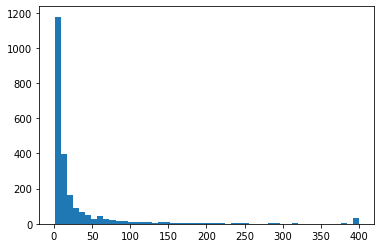

In [26]:
data = np.clip(data, 1, 400)
hist_show(data)

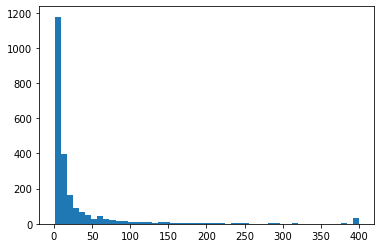

In [27]:
data = replace_zero_to_mean(data)
hist_show(data)

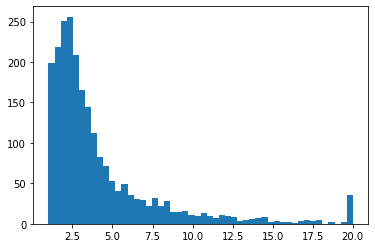

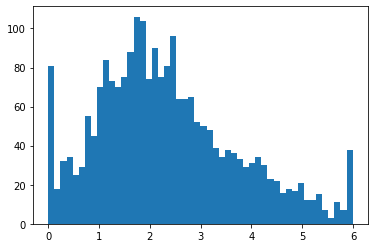

In [28]:
hist_show(data**0.5)
hist_show(np.log(data))

In [29]:
dataset['guests'] = mm_scaler(np.log(data))
dataset.head(10)

,base_fond,science_fond,ams,n_buildings,n_days,guests
0,0.871895,0.681744,0.000000,0.000000,0.938635,0.480550
1,0.665213,0.705233,0.220794,0.309087,0.945497,0.772254
2,0.819225,0.623368,0.000000,0.000000,0.860134,0.557937
3,-0.220496,0.580591,0.129641,0.000000,0.994121,0.667010
4,0.407500,0.721147,0.103005,0.077793,0.860134,0.344968
5,0.695033,0.704603,0.119234,0.000000,0.870074,0.387616
6,-1.312439,0.420758,0.000000,0.000000,0.931638,0.814199
7,-0.230401,0.528075,0.112309,0.000000,0.870074,0.165778
8,0.200020,0.638670,0.064135,0.137486,0.940937,0.498323
9,-0.787443,0.561033,0.000000,0.000000,0.885153,0.293394


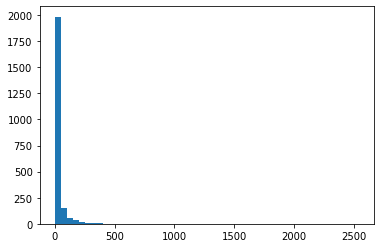

In [30]:
data = museum_dataset['employees']
hist_show(data)

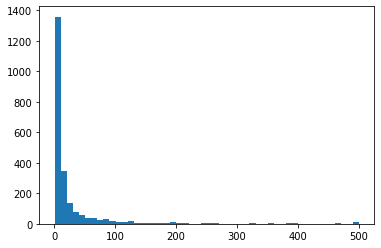

In [31]:
data = np.clip(data, 0, 500)
hist_show(data)

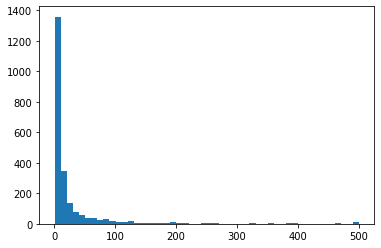

In [32]:
data = replace_zero_to_mean(data)
hist_show(data)

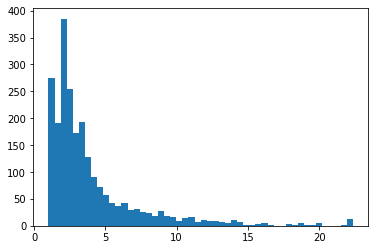

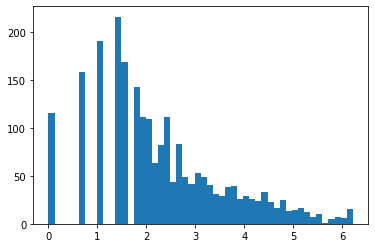

In [33]:
hist_show(data**0.5)
hist_show(np.log(data))

In [34]:
dataset['employees'] = mm_scaler(np.log(data))
dataset.head(10)

,base_fond,science_fond,ams,n_buildings,n_days,guests,employees
0,0.871895,0.681744,0.000000,0.000000,0.938635,0.480550,0.465093
1,0.665213,0.705233,0.220794,0.309087,0.945497,0.772254,0.593582
2,0.819225,0.623368,0.000000,0.000000,0.860134,0.557937,0.465093
3,-0.220496,0.580591,0.129641,0.000000,0.994121,0.667010,0.370512
4,0.407500,0.721147,0.103005,0.077793,0.860134,0.344968,0.258977
5,0.695033,0.704603,0.119234,0.000000,0.870074,0.387616,0.176779
6,-1.312439,0.420758,0.000000,0.000000,0.931638,0.814199,0.541836
7,-0.230401,0.528075,0.112309,0.000000,0.870074,0.165778,0.111535
8,0.200020,0.638670,0.064135,0.137486,0.940937,0.498323,0.482047
9,-0.787443,0.561033,0.000000,0.000000,0.885153,0.293394,0.176779


In [35]:
dataset.to_csv('prepared_data.csv', index=False)